In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

data = pd.read_csv('cloud-data/bus_data.csv')
data.head()

,id,name,type,calculatedCourse,routeName,created,longitude,latitude,paxLoad,totalCap,more,tripId,deviceId,routeBlockId,timestamp,speed
0,4855,4131,Transit Bus,212.735226,LX Route,02:23 PM,-74.433571,40.519749,0,67,101,NaN,402213,111417,2024-10-31 18:24:00,NaN
1,4859,4177,Transit Bus,128.232575,LX Route,02:23 PM,-74.436304,40.524327,27,67,102,NaN,402325,111417,2024-10-31 18:24:00,NaN
2,4873,4191,Transit Bus,240.802514,B Route,02:23 PM,-74.457712,40.523463,8,67,101,NaN,402329,113278,2024-10-31 18:24:00,NaN
3,4876,4194,Transit Bus,299.246496,B Route,02:23 PM,-74.438946,40.521624,4,67,102,NaN,402330,113250,2024-10-31 18:24:00,NaN
4,17624,4002,Heavy Duty Transit LF,226.694476,REXB Route,02:23 PM,-74.438830,40.483538,2,68,102,NaN,402643,112511,2024-10-31 18:24:00,NaN


In [3]:
# convert timestamp to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])
try:
    data.drop(['speed', 'outOfService', 'tripId', 'outdated'], axis=1, inplace=True)
except:
    data.drop(['speed', 'tripId'], axis=1, inplace=True)
data['load'] = data['paxLoad'] / data['totalCap']
# only use the latitude and longitude columns between certain values
data = data[(data['latitude'] > 40.4) & (data['latitude'] < 40.53)]
data = data[(data['longitude'] > -74.5) & (data['longitude'] < -74.3)]
data.head()

,id,name,type,calculatedCourse,routeName,created,longitude,latitude,paxLoad,totalCap,more,deviceId,routeBlockId,timestamp,load
0,4855,4131,Transit Bus,212.735226,LX Route,02:23 PM,-74.433571,40.519749,0,67,101,402213,111417,2024-10-31 18:24:00,0.000000
1,4859,4177,Transit Bus,128.232575,LX Route,02:23 PM,-74.436304,40.524327,27,67,102,402325,111417,2024-10-31 18:24:00,0.402985
2,4873,4191,Transit Bus,240.802514,B Route,02:23 PM,-74.457712,40.523463,8,67,101,402329,113278,2024-10-31 18:24:00,0.119403
3,4876,4194,Transit Bus,299.246496,B Route,02:23 PM,-74.438946,40.521624,4,67,102,402330,113250,2024-10-31 18:24:00,0.059701
4,17624,4002,Heavy Duty Transit LF,226.694476,REXB Route,02:23 PM,-74.438830,40.483538,2,68,102,402643,112511,2024-10-31 18:24:00,0.029412


In [4]:
one_bus = 4131
one_bus_data = data[data['name'] == one_bus]
one_bus_data.head()

,id,name,type,calculatedCourse,routeName,created,longitude,latitude,paxLoad,totalCap,more,deviceId,routeBlockId,timestamp,load
0,4855,4131,Transit Bus,212.735226,LX Route,02:23 PM,-74.433571,40.519749,0,67,101,402213,111417,2024-10-31 18:24:00,0.0
48,4855,4131,Transit Bus,191.309932,LX Route,02:24 PM,-74.433572,40.519742,0,67,101,402213,111417,2024-10-31 18:24:31,0.0
96,4855,4131,Transit Bus,191.309932,LX Route,02:24 PM,-74.433574,40.519740,0,67,101,402213,111417,2024-10-31 18:25:01,0.0
144,4855,4131,Transit Bus,104.574216,LX Route,02:25 PM,-74.433558,40.519738,0,67,101,402213,111417,2024-10-31 18:25:32,0.0
191,4855,4131,Transit Bus,74.407189,LX Route,02:25 PM,-74.433549,40.519738,0,67,101,402213,111417,2024-10-31 18:26:02,0.0


In [5]:
one_bus_data['routeName'].unique()

array(['LX Route', 'H Route', 'Weekend 1'], dtype=object)

In [6]:
one_bus_data.describe()

,id,name,calculatedCourse,longitude,latitude,paxLoad,totalCap,more,deviceId,routeBlockId,timestamp,load
count,4297.0,4297.0,4297.000000,4297.000000,4297.000000,4297.000000,4297.0,4297.000000,4297.0,4297.000000,4297,4297.000000
mean,4855.0,4131.0,178.137078,-74.451875,40.513211,5.354899,67.0,101.511752,402213.0,109363.838027,2024-11-03 07:02:51.192460032,0.079924
min,4855.0,4131.0,0.937388,-74.466480,40.479058,0.000000,67.0,21.000000,402213.0,70462.000000,2024-10-31 18:24:00,0.000000
25%,4855.0,4131.0,102.635014,-74.458219,40.503586,1.000000,67.0,101.000000,402213.0,111417.000000,2024-11-01 13:25:52,0.014925
50%,4855.0,4131.0,152.744672,-74.452332,40.515355,3.000000,67.0,102.000000,402213.0,111630.000000,2024-11-01 22:45:01,0.044776
75%,4855.0,4131.0,275.794914,-74.447406,40.523582,9.000000,67.0,102.000000,402213.0,111649.000000,2024-11-04 15:40:49,0.134328
max,4855.0,4131.0,359.898789,-74.428800,40.526514,29.000000,67.0,103.000000,402213.0,111653.000000,2024-11-07 21:51:49,0.432836
std,0.0,0.0,96.700352,0.008511,0.010141,5.940302,0.0,3.023329,0.0,9231.615376,NaN,0.088661


C:\Users\akash\AppData\Local\Temp\ipykernel_21720\1869793204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_bus_data['time_diff'] = one_bus_data['timestamp'].diff().dt.total_seconds()
C:\Users\akash\AppData\Local\Temp\ipykernel_21720\1869793204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_bus_data['lat_diff'] = one_bus_data['latitude'].diff()
C:\Users\akash\AppData\Local\Temp\ipykernel_21720\1869793204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

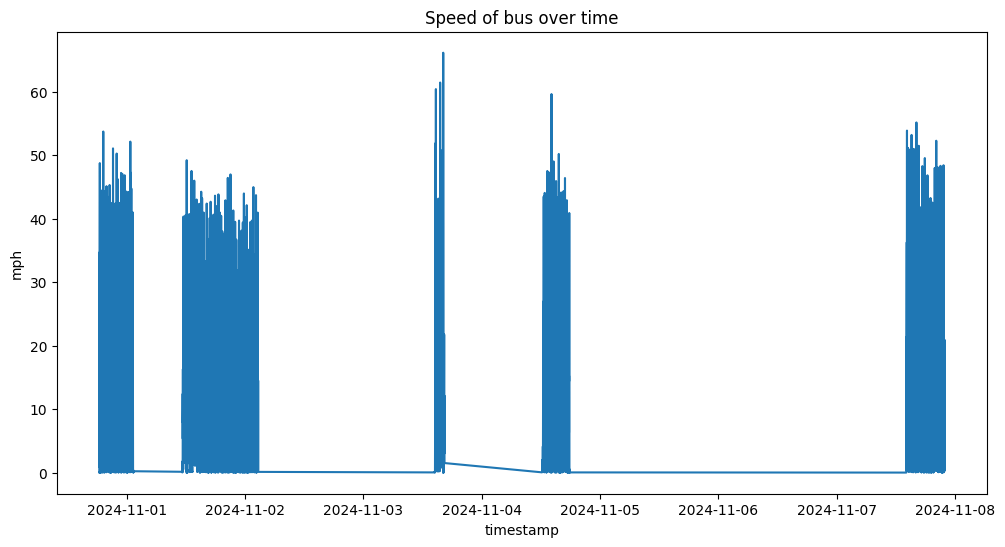

In [7]:
# convert the difference in longitude and latitude to miles per hour
# use difference in timestamp to calculate time
one_bus_data['time_diff'] = one_bus_data['timestamp'].diff().dt.total_seconds()
one_bus_data['lat_diff'] = one_bus_data['latitude'].diff()
one_bus_data['long_diff'] = one_bus_data['longitude'].diff()
one_bus_data['lat_miles'] = one_bus_data['lat_diff'] * 69
one_bus_data['long_miles'] = one_bus_data['long_diff'] * 53
one_bus_data['total_miles'] = (one_bus_data['lat_miles'] ** 2 + one_bus_data['long_miles'] ** 2) ** 0.5
one_bus_data['mph'] = one_bus_data['total_miles'] / one_bus_data['time_diff'] * 3600

# plot the speed of the bus over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='mph', data=one_bus_data)


plt.title('Speed of bus over time')
plt.show()

In [8]:
# calculate the change in load over time
one_bus_data['load_diff'] = one_bus_data['load'].diff()

C:\Users\akash\AppData\Local\Temp\ipykernel_21720\1176286829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_bus_data['load_diff'] = one_bus_data['load'].diff()


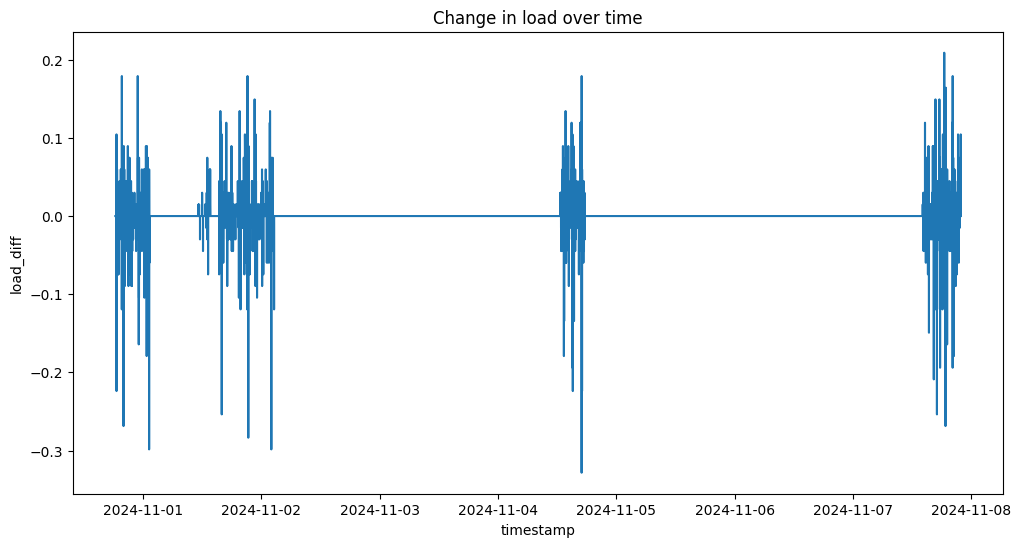

In [9]:
# plot the change in load over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='load_diff', data=one_bus_data)
plt.title('Change in load over time')
plt.show()

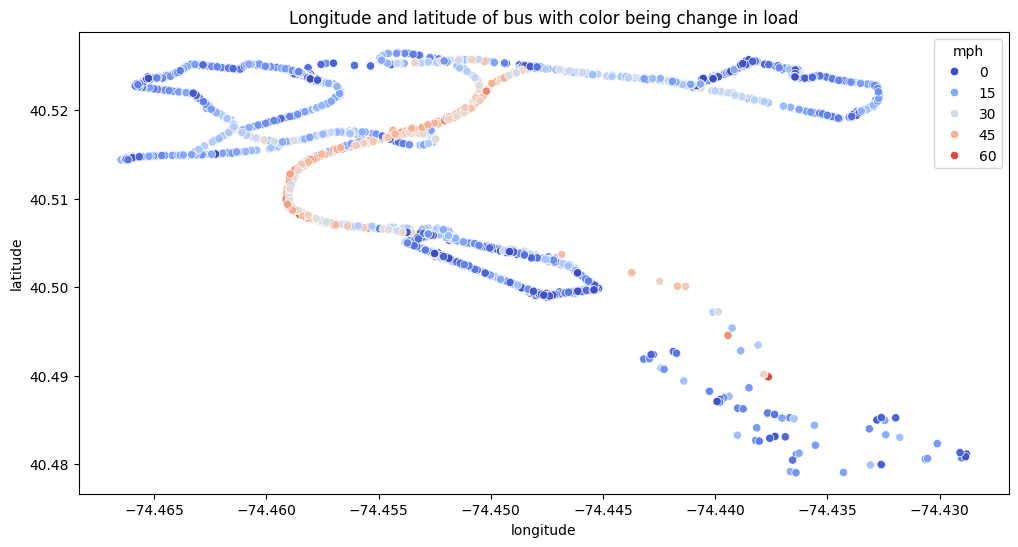

In [12]:
# plot longitude and latitude of bus with color being change in load
plt.figure(figsize=(12, 6))
sns.scatterplot(x='longitude', y='latitude', hue='mph', data=one_bus_data, palette='coolwarm')
plt.title('Longitude and latitude of bus with color being change in load')
plt.show()

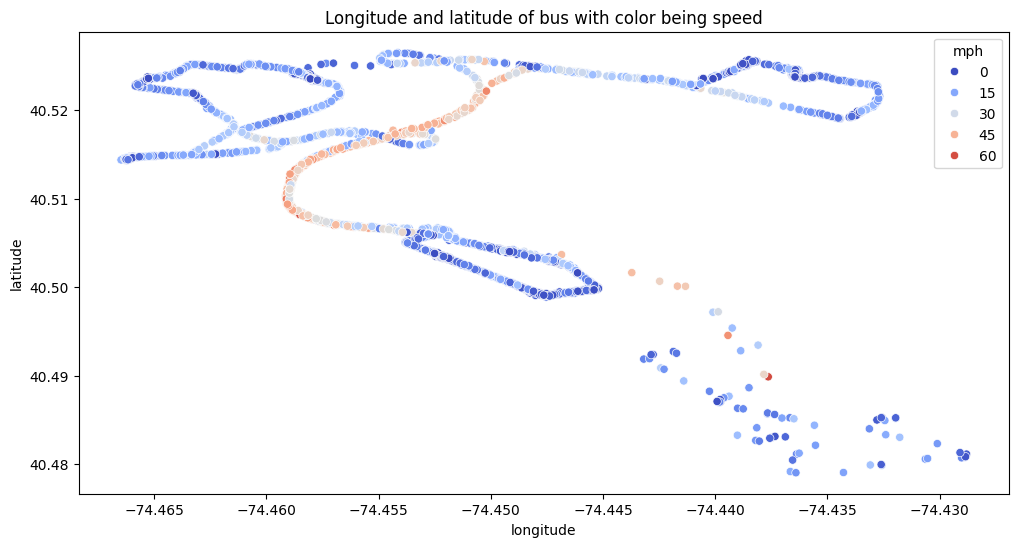

In [ ]:
# graph all the places with 0 mph in color and everywhere else in black
plt.figure(figsize=(12, 6))
sns.scatterplot(x='longitude', y='latitude', hue='mph', data=one_bus_data, palette='coolwarm')
plt.title('Longitude and latitude of bus with color being speed')
plt.show()

In [ ]:
one_bus_data['not_moving'].describe()

count      4297
unique        2
top       False
freq       4001
Name: not_moving, dtype: object

C:\Users\akash\AppData\Local\Temp\ipykernel_21720\1207899318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_bus_data['not_moving'] = one_bus_data['mph'] < 0.1
C:\Users\akash\AppData\Local\Temp\ipykernel_21720\1207899318.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_bus_data['time_waiting'] = one_bus_data['not_moving'].cumsum() * 5


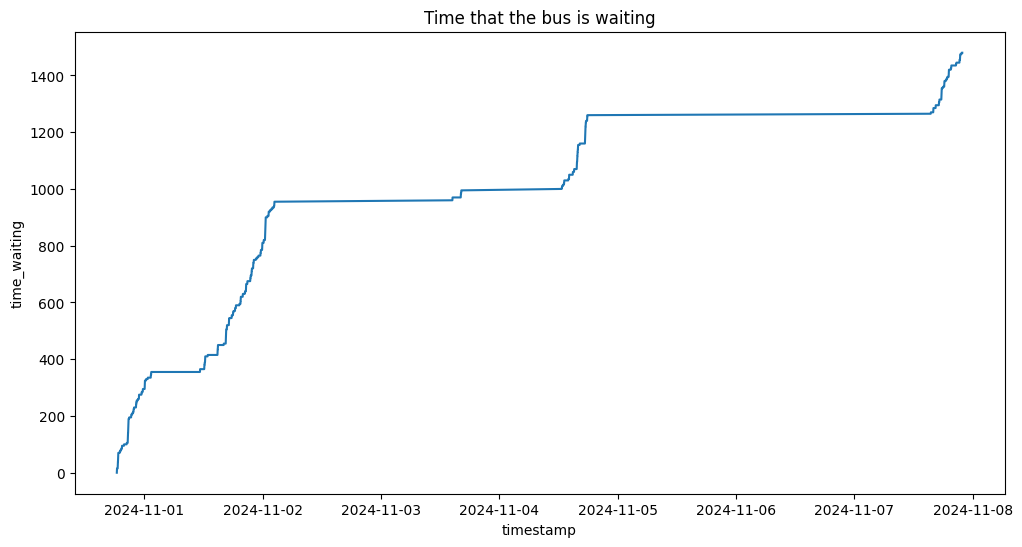

In [19]:
# get the time periods when the bus is not moving
one_bus_data['not_moving'] = one_bus_data['mph'] < 0.1

# calculate the time that the bus is waiting
one_bus_data['time_waiting'] = one_bus_data['not_moving'].cumsum() * 5

# plot the time that the bus is waiting
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='time_waiting', data=one_bus_data)
plt.title('Time that the bus is waiting')
plt.show()